<h1 style = 'text-align: center; font-size: 24pt; color : #f31567; font-family: Comic Sans MS;'> Reflectance Comparison between simulated and Measured Spectra of SiPM </h1>
<p>
Terminology :
<br> 
Reflectivity is the limit value of reflectance when the sample is thick. It is the intrinsic reflection of the surface.

Reflectance is a fraction of electromagnetic power reflected form material or surface. Reflectivity is a property of a material.
</p>
<span style = 'color: red'> Notes: </span>
<ol>
    <li> 30 Nov started working on vacuum data</li>
</ol>

In [1]:
from os import path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import scipy
from scipy.stats import norm
from scipy.interpolate import interp1d
from matplotlib import rc

In [2]:
rc('figure', autolayout=True, figsize=[16, 9], dpi=150)
rc('font', family='monospace')
rc('axes', titlesize=20, titleweight='heavy', labelsize=18, labelweight='bold')
rc(('xtick', 'ytick'), labelsize = 16)
rc('legend', fontsize=14)
rc('lines', markersize=10)
rc('xtick.minor', visible=True, size=6)
rc('xtick.major', size=11, width=1.2)
rc('ytick.minor', visible=True, size=6)
rc('ytick.major', size=11, width=1.2)

In [3]:
%%html
<!--- html styling for Jupyter Dark Theme---!>
<style>
.CodeMirror-focused .CodeMirror-selected { background: none; }
.CodeMirror-focused .CodeMirror-selectedtext { background: #FF0088; } 
.CodeMirror-selected { background:  grey; }
</style>
<!--- greenish #00FF88 ; pinkish #FF0088 ; turquoise---!>

In [4]:
project_dir = r'C:\Users\sarth\projects\LY_Analytic_Model'

In [5]:
R_SiPM_measured_df = pd.read_csv(path.join(project_dir,
                                           'Data', 'sipm_hr1_processed.txt'), 
                                 sep='\t')
# 'Data' is the name of the folder containing Data files

# R_SiPM_measured_df['R'] = [int(value)/100 for value in R_SiPM_measured_df['R']]

R_SiPM_measured_df['R'] = R_SiPM_measured_df['R']/100

In [6]:
R_SiPM_measured_cor_df =pd.read_csv(path.join(project_dir,
                                           'Data', 'SiPM_Rrel_corrected_trunc.csv'))

In [7]:
# for column_name in R_SiPM_measured_cor_df.columns:
    # print(column_name)
R_SiPM_measured_cor_df = R_SiPM_measured_cor_df[ R_SiPM_measured_cor_df['SiPM on black'] >= 0]

In [8]:
R_SiPM_measured_cor_df
# R_SiPM_measured_df['R']

,Wavelength,SiPM on black,SiPM on white
0,185.0,49.112084,29.986672
1,185.5,47.979090,29.125740
2,186.0,46.986552,28.087984
3,186.5,46.175987,26.938566
4,187.0,45.078965,25.838128
...,...,...,...
1615,992.5,20.997029,46.507812
1616,993.0,17.222055,47.513204
1617,993.5,11.453348,44.701132
1618,994.0,6.508119,44.733682


In [9]:
# # ----------   Marcin corrected reflectance profile ----------
# fig = plt.figure()
# ax12 = plt.axes()
# ax12.plot(R_SiPM_measured_cor_df['Wavelength'], R_SiPM_measured_cor_df['SiPM on black'])
# ax12.plot(R_SiPM_measured_cor_df['Wavelength'], R_SiPM_measured_cor_df['SiPM on white'])

In [10]:
# R_SiPM_alberto_df = pd.read_csv(path.join(project_dir, 'Data', 'Alberto_data', 
#                                           'all_data reflectance LAr_NUV-HD-Cryo.txt'), 
#                                 sep='\t')
R_SiPM_alberto_df = pd.read_csv(path.join(project_dir, 'Data', 'Alberto_data', 
                                          'all_data reflectance vacuum_NUV-HD-Cryo.txt'), 
                                sep='\t')
R_SiPM_alberto_df2 = R_SiPM_alberto_df.copy()
# R_SiPM_alberto_df['Wavelength']
# R_SiPM_alberto_df['']
# R_SiPM_alberto_df

<h3 style = 'color:orange'> Get Reflectance value for 7 degree incidence by interpolating along rows. </h3>

In [11]:
# R_SiPM_alberto_df = pd.read_csv(path.join(project_dir, 'Data','Alberto_data','all_data reflectance LAr_NUV-HD-Cryo.txt'), sep = '\t') 
chosen_angle = 7
value_list = []
angle_list = np.arange(0, 90, 5)
for row_index in range(R_SiPM_alberto_df.shape[0]):
    R_value_single_wavelength = R_SiPM_alberto_df.iloc[row_index, 1:]
    interpolate_func = interp1d(angle_list, R_value_single_wavelength)
    interpolate_value = interpolate_func(chosen_angle)
    value_list.append(float(interpolate_value))

R_SiPM_alberto_df.insert(3, str(chosen_angle), value_list, False)

In [12]:
## 5 and 10 degrees and 5 nm slit 

In [13]:
# fig1 = plt.figure()
# ax1 = plt.axes()

# ax1.plot(R_SiPM_alberto_df['Wavelength'][0::10],
#          ((R_SiPM_alberto_df['05'] + R_SiPM_alberto_df['10'])/2)[0::10],
#          marker='*', color='red', label='Alberto data')
# ax1.plot(R_SiPM_measured_df['Wavelength'][::10], R_SiPM_measured_df['R'][::10], marker = '*', color = 'blue', label = 'Measurements')
# ax1.set_yscale('log')
# ax1.grid()
# fig1.set_facecolor('grey')
# ax1.set_title('Alberto vs measurement; No interpolation')
# ax1.legend()

In [14]:
# %matplotlib inline

# fig5 = plt.figure()
# ax5 = plt.axes()
# ax5.scatter(R_SiPM_alberto_df['Wavelength'][0::10], ((R_SiPM_alberto_df['05'] + R_SiPM_alberto_df['10'])/2)[0::10], color = 'red', label = 'Average of 5 and 10 degrees' )
# ax5.plot(R_SiPM_alberto_df['Wavelength'][0::10], R_SiPM_alberto_df['7'][0::10], color = 'blue', label = ' Interpolated to 7 degrees ')
# ax5.set_yscale('log')
# ax5.grid()
# fig5.set_facecolor('grey')
# ax5.set_title('Alberto (interpolated) vs measurement;')
# ax5.legend()

<h4 style = 'color: orange'> Making Smooth functions </h4>

In [15]:
## smoothing

# R_SiPM_alberto_7_5_degrees = (R_SiPM_alberto_df['05'] + R_SiPM_alberto_df['10'])/2

# R_SiPM_alberto_inter_func = interp1d(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_7_5_degrees)

wavelength_vector = np.arange(240, 995, 5)

R_SiPM_alberto_7_inter_func = interp1d( R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['7'] )
R_SiPM_alberto_7_smooth = R_SiPM_alberto_7_inter_func(wavelength_vector)

R_SiPM_measured_inter_func = interp1d( R_SiPM_measured_df['Wavelength'], R_SiPM_measured_df['R'] )
R_SiPM_measured_smooth = R_SiPM_measured_inter_func(wavelength_vector)


## 5 and 10 degree function probably not that relevant anymore. comment out?

R_SiPM_alberto_05_inter_func = interp1d(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['05'])
R_SiPM_alberto_05_smooth = R_SiPM_alberto_05_inter_func(wavelength_vector)

R_SiPM_alberto_10_inter_func = interp1d(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['10'])
R_SiPM_alberto_10_smooth = R_SiPM_alberto_10_inter_func(wavelength_vector)

R_SiPM_measured_cor_black_inter_func = interp1d(R_SiPM_measured_cor_df['Wavelength'],
                                                R_SiPM_measured_cor_df['SiPM on black'])

R_SiPM_measured_cor_black_smooth = R_SiPM_measured_cor_black_inter_func(wavelength_vector)

R_SiPM_measured_cor_white_inter_func = interp1d(R_SiPM_measured_cor_df['Wavelength'],
                                                R_SiPM_measured_cor_df['SiPM on white'])

R_SiPM_measured_cor_white_smooth = R_SiPM_measured_cor_white_inter_func(wavelength_vector)

In [16]:
max(R_SiPM_measured_cor_df['SiPM on black'])

52.65726129

In [17]:
# %matplotlib qt
# fig2 = plt.figure()
# ax2 = plt.axes()
# ax2.plot(wavelength_vector, R_SiPM_alberto_7_smooth, marker = '*', color = 'red', label = 'Alberto data' )
# ax2.plot(wavelength_vector, R_SiPM_measured_smooth, color = 'blue', label = 'Measurements' )
# ax2.set_yscale('log')
# fig2.set_facecolor('grey')
# ax2.set_title(' Alberto (interpolated) vs measurement ;interpolation on x axis for better comparison')
# ax2.set_xlabel('Wavelength in nm from 240 to 1000')
# ax2.set_ylabel('Reflectance in %')
# ax2.grid()
# ax2.legend()

In [18]:
# max( R_SiPM_alberto_df['05'] )

In [19]:
# max( R_SiPM_alberto_df['10'] )

In [20]:
# max( R_SiPM_alberto_df['7'] ) 

In [21]:
# max( R_SiPM_measured_df['R'] )

In [22]:
## how remove effect of finite slit width specrtra? Astronomy may have some effect.

In [23]:
### didn't work.

# spectra_file = path.join(project_dir, 'Data', 'tpbesr_man_hr1.spc')

# from pyspectra.readers.read_spc import read_spc

# spc_data = read_spc(r'C:\Users\sarth\projects\LY_Analytic_Model\Data\tpbesr_man_hr1.spc')

# spc_data

<h4 style = 'color: orange;'>  Playing with convolution</h4>

In [24]:
# plt.plot(np.convolve(sin_func, norm.pdf(x_axis, mean, sd)))
# len( np.convolve(sin_func, norm.pdf(x_axis, mean, sd)) )

# %matplotlib inline

x_axis = wavelength_vector.copy()
### Calculating mean and standard deviation
mean = statistics.mean(x_axis)
# sd = statistics.stdev(x_axis)
### we provide standard deviation as per our requirement
sd = 5 # Marcin suggests sd = 5
# sd = 10
# sd = 15

norm_distr = norm.pdf(x_axis, mean, sd) 
# norm_distr = norm.pdf(x_axis, mean, 50) 
# plt.plot(x_axis, norm_distr )
# plt.show()

print('mean:', mean, '\n', 'sd:', sd)

mean: 615 
 sd: 5


<h4 style = "color:orange"> back to  comparison</h4>

<p> new computations with convolution </p>

In [25]:
# R_SiPM_alberto_convolved = np.convolve( R_SiPM_alberto_smooth, norm_distr, 'same')

# %matplotlib inline
# # %matplotlib qt

# fig3 = plt.figure()
# ax3 = plt.axes()

# ax3.plot(wavelength_vector, R_SiPM_alberto_convolved, marker = '*', color = 'lime', label = 'Alberto convolved' )
# ax3.plot(wavelength_vector, R_SiPM_alberto_smooth, marker = '*', color = 'red', label = 'Alberto data' )
# ax3.plot(wavelength_vector, R_SiPM_measured_smooth, marker = '*', color = 'blue', label = 'Measurements' )

# ax3.plot(wavelength_vector, norm_distr, marker = '*', color = 'teal', label ='Normal distribution ')
# ax3.set_yscale('log')
# fig3.set_facecolor('grey')
# ax3.set_title(' Alberto vs measurement ;interpolation on x axis for better comparison')
# ax3.set_xlabel('Wavelength in nm from 240 to 1000')
# ax3.set_ylabel('Reflectance in %')
# ax3.grid()
# ax3.legend()

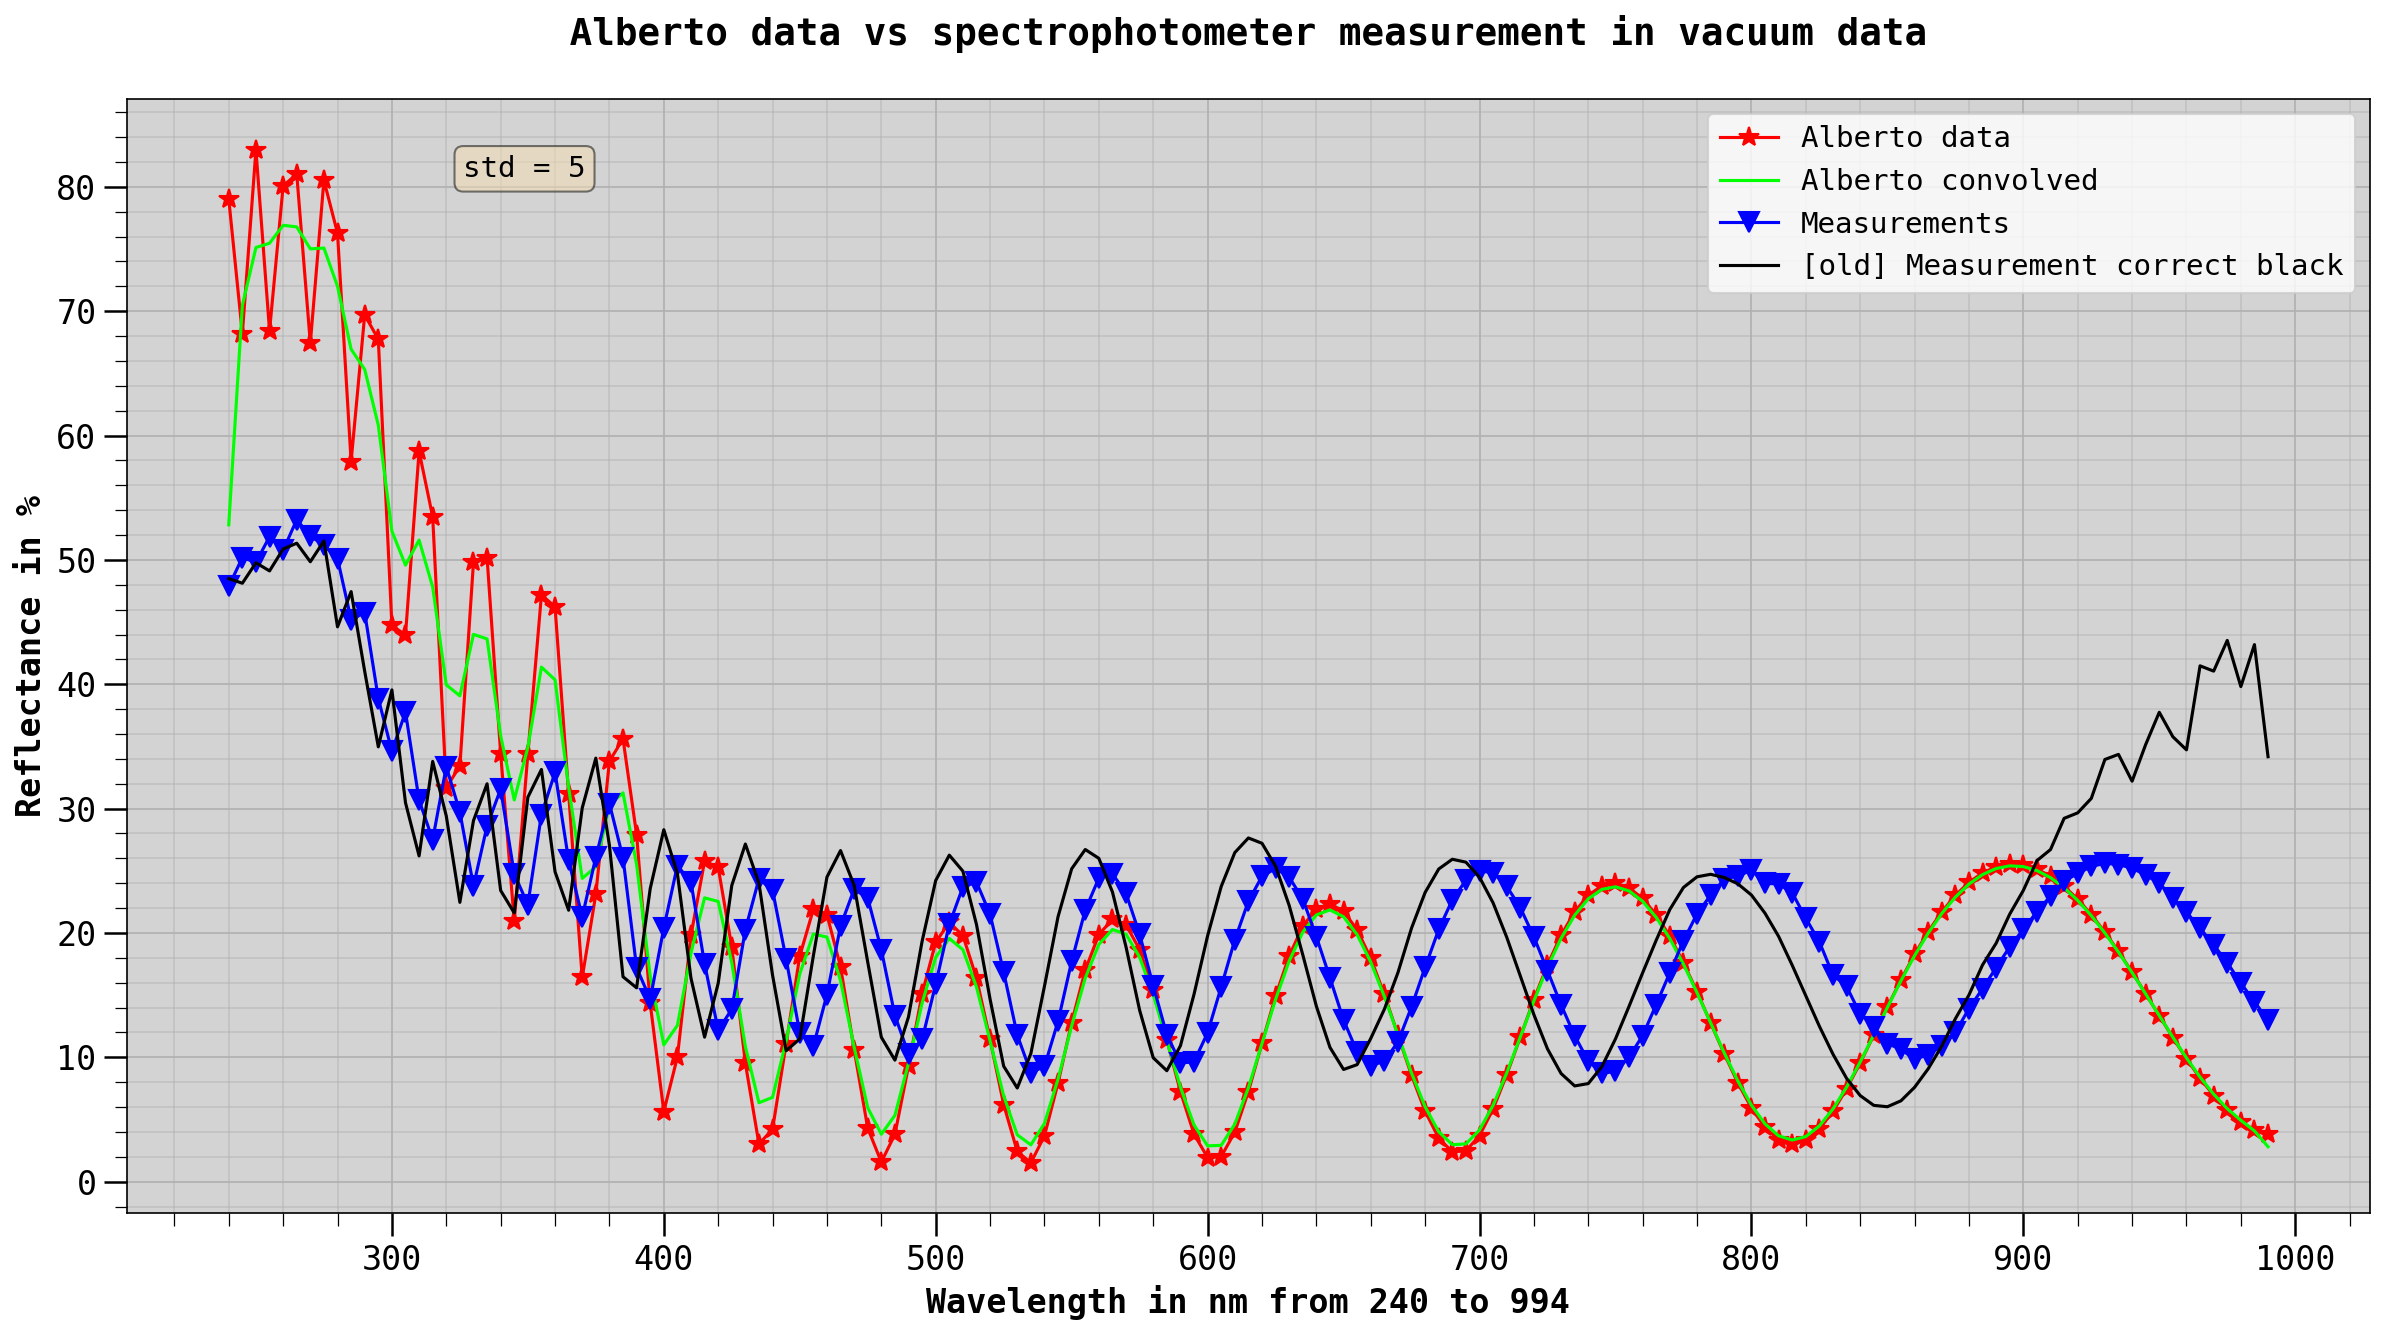

In [26]:
### Normalization to achieve sum of all bins on y axis  = 1 (Marcin)

R_SiPM_alberto_7_convolved = np.convolve( R_SiPM_alberto_7_smooth, norm_distr/sum(norm_distr), 'same')
# %matplotlib inline
# %matplotlib qt

fig3 = plt.figure('3', figsize=[16,9], dpi=150)
ax3 = plt.axes()

ax3.plot(wavelength_vector,  100*R_SiPM_alberto_7_smooth, marker = '*', color = 'red', label = 'Alberto data' )
ax3.plot(wavelength_vector, 100*R_SiPM_alberto_7_convolved, color = 'lime', label = 'Alberto convolved' )
ax3.plot(wavelength_vector, 100*R_SiPM_measured_smooth, marker = 'v', color = 'blue', label = 'Measurements' )

# ax3.plot(wavelength_vector, R_SiPM_measured_cor_white_smooth, color='gold', label='[old] Measurement correct white')

ax3.plot(wavelength_vector, R_SiPM_measured_cor_black_smooth, color='black', label='[old] Measurement correct black')

# ax3.scatter(x_axis, norm_distr/sum(norm_distr), color = 'teal', label ='Normal distribution ')
ax3.set_yscale('linear')
fig3.set_facecolor('white')
ax3.set_facecolor('lightgrey')
ax3.set_title(' Alberto data vs spectrophotometer measurement in vacuum data \n', fontsize='18', weight='bold')
ax3.set_xlabel('Wavelength in nm from 240 to 994', fontsize='16', weight='bold')
ax3.set_ylabel('Reflectance in %', fontsize='16', weight='bold')

# ax3.set_xticks(np.arange(200,1000,10), minor=True)
ax3.grid(which='minor', alpha=0.5)
ax3.grid(which='major', alpha=1.0)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
txtstr = 'std = ' + str(sd)
ax3.text(0.15, 0.95, txtstr, transform=ax3.transAxes, fontsize=14, verticalalignment='top', bbox=props)
ax3.legend()
# fig3.savefig(r'C:\Users\sarth\projects\LY_Analytic_Model\SiPM_Reflectance_Measurement\alberto_simulation_vs_measumrent_vacuum_lightgrey.png')

In [27]:
# ### over plotting reflectances for 5 and 10 degrees.

# # %matplotlib inline
# # %matplotlib qt

# fig4 = plt.figure('4')
# ax4 = plt.axes()
# ## ax4.scatter(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['05'] , marker = 'o', facecolor = 'none', edgecolor = 'blue')
# ## ax4.scatter(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['10'] , marker = '*', facecolor = 'orange', edgecolor = 'none')
# ## ax4.plot( wavelength_vector, R_SiPM_alberto_05_smooth )
# ## ax4.plot( wavelength_vector, R_SiPM_alberto_10_smooth )

# R_SiPM_alberto_05_convolved = np.convolve( R_SiPM_alberto_05_smooth, norm_distr/sum(norm_distr), 'same')
# R_SiPM_alberto_10_convolved = np.convolve( R_SiPM_alberto_10_smooth, norm_distr/sum(norm_distr), 'same')

# ax4.plot(wavelength_vector, R_SiPM_alberto_05_smooth, color = 'red', label = 'Alberto data 05 degrees' )
# ax4.plot(wavelength_vector, R_SiPM_alberto_10_smooth, color = '#00FFFF', label = 'Alberto data 10 degrees' )
# # ax4.plot(wavelength_vector, R_SiPM_alberto_7_smooth, color = 'red', label = 'Alberto data 7 degrees incident' )

# ax4.scatter(wavelength_vector, R_SiPM_alberto_05_convolved, marker = '*', s = 70, color = 'lime', label = 'Alberto convolved 05' )
# ax4.scatter(wavelength_vector, R_SiPM_alberto_10_convolved, marker = '*', s = 70, color = 'yellow', label = 'Alberto convolved 10' )
# # ax4.scatter(wavelength_vector, R_SiPM_alberto_7_convolved, marker = '*', s = 70, color = 'lime', label = 'Alberto convolved 7' )

# ax4.scatter(wavelength_vector, R_SiPM_measured_smooth, marker = 'v', color = 'blue', label = 'Measurements' )
# # ax4.scatter(x_axis, norm_distr/sum(norm_distr), color = 'teal', label ='Normal distribution ')
# ax4.set_yscale('log')
# fig4.set_facecolor('grey')
# ax4.set_title(' Alberto vs measurement ;interpolation on x axis for better comparison')
# ax4.set_xlabel('Wavelength in nm from 240 to 1000')
# ax4.set_ylabel('Reflectance in %')
# ax4.grid()
# # ax3.legend()
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# txtstr = 'std = ' + str(sd)
# ax4.text(0.15, 0.95, txtstr, transform=ax4.transAxes, fontsize=14, verticalalignment='top', bbox=props)
# ax4.legend()

<h4 style = 'color: magenta'> Average reflectance over angle from 0 to 90 angles</h4>
<p> Shouldn't we account for how light bounces around in the integrating sphere  before exiting it</p>

In [28]:
# # R_SiPM_alberto_avg

# R_SiPM_alberto_avg = pd.DataFrame()

# R_SiPM_alberto_avg['Wavelength'] = R_SiPM_alberto_df['Wavelength']

# R_SiPM_alberto_avg['avg'] =  R_SiPM_alberto_df.iloc[:,1:].mean(axis=1)

In [29]:
# ### here I convolve and plot for average of all angles from 0 to 90 

# # %matplotlib inline
# # %matplotlib qt

# fig4 = plt.figure()
# ax4 = plt.axes()
# ## ax4.scatter(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['05'] , marker = 'o', facecolor = 'none', edgecolor = 'blue')
# ## ax4.scatter(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['10'] , marker = '*', facecolor = 'orange', edgecolor = 'none')
# ## ax4.plot( wavelength_vector, R_SiPM_alberto_05_smooth )
# ## ax4.plot( wavelength_vector, R_SiPM_alberto_10_smooth )
# R_SiPM_alberto_avg_inter_func = interp1d( R_SiPM_alberto_avg['Wavelength'], R_SiPM_alberto_avg['avg'] )
# R_SiPM_alberto_avg_smooth = R_SiPM_alberto_avg_inter_func(wavelength_vector)

# R_SiPM_alberto_avg_convolved = np.convolve( R_SiPM_alberto_avg_smooth, norm_distr/sum(norm_distr), 'same')

# ## R_SiPM_alberto_05_convolved = np.convolve( R_SiPM_alberto_05_smooth, norm_distr/sum(norm_distr), 'same')
# ## R_SiPM_alberto_10_convolved = np.convolve( R_SiPM_alberto_10_smooth, norm_distr/sum(norm_distr), 'same')

# ax4.plot(wavelength_vector, R_SiPM_alberto_avg_convolved, color = 'orange', marker ='H', label = 'Alberto data averaged over angles' )

# ## ax4.plot(wavelength_vector, R_SiPM_alberto_05_smooth, color = 'red', label = 'Alberto data 05 degrees' )
# ## ax4.plot(wavelength_vector, R_SiPM_alberto_10_smooth, color = '#00FFFF', label = 'Alberto data 10 degrees' )

# ax4.plot(wavelength_vector, R_SiPM_alberto_7_smooth, color = 'red', label = 'Alberto data 7 degrees incident' )

# ## ax4.scatter(wavelength_vector, R_SiPM_alberto_05_convolved, marker = '*', s = 70, color = 'lime', label = 'Alberto convolved 05' )
# ## ax4.scatter(wavelength_vector, R_SiPM_alberto_10_convolved, marker = '*', s = 70, color = 'yellow', label = 'Alberto convolved 10' )

# ax4.scatter(wavelength_vector, R_SiPM_alberto_7_convolved, marker = '*', s = 70, color = 'lime', label = 'Alberto convolved 7' )

# ax4.scatter(wavelength_vector, R_SiPM_measured_smooth, marker = 'v', color = 'blue', label = 'Measurements' )

# # ax4.scatter(x_axis, norm_distr/sum(norm_distr), color = 'teal', label ='Normal distribution ')
# ax4.set_yscale('log')
# fig4.set_facecolor('grey')
# ax4.set_title(' Alberto vs measurement ;interpolation on x axis for better comparison')
# ax4.set_xlabel('Wavelength in nm from 240 to 1000')
# ax4.set_ylabel('Reflectance in %')
# ax4.grid()
# # ax3.legend()
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# txtstr = 'std = ' + str(sd)
# ax4.text(0.15, 0.95, txtstr, transform=ax4.transAxes, fontsize=14, verticalalignment='top', bbox=props)
# ax4.legend()

<h3 style = 'color: magenta'> Step function as slit function</h3>

In [30]:
# def step_function(step_size, x_distribution):
#     initial_step = x_distribution.mean()
#     next_step = initial_step + step_size
#     y_value = []
#     for x_value in x_distribution:
#         if (x_value > initial_step) & (x_value < next_step)  :
#             y_value.append(1)
#         else :
#             y_value.append(0)
#     return np.array(y_value)

In [31]:
# # an example of a step function

# %matplotlib inline

# my_x = np.arange(0,10, 0.01)
# my_y = step_function(1, my_x)
# ax11= plt.axes()
# ax11.plot(my_x, my_y, color='C0', label = 'step_function')
# ax11.plot(my_x, np.sin(my_x), color='C1', label = 'original signal')
# ax11.plot(my_x, np.convolve(my_y, np.sin(my_x), 'same')/max(np.convolve(my_y, np.sin(my_x), 'same')), 
#           color='C3', label = 'convolved signal')
# ax11.legend(loc = 'upper right')

<h4 style = 'color: magenta'> Is this right strategy to convolve two functions? </h4>

In [32]:
# %matplotlib inline
# plt.figure()
# my_X = np.arange(0, 15,0.1)
# my_Y = np.sin(my_X)
# slit_func = step_function( 1, my_X)
# plt.plot( my_X, my_Y, '-r')
# plt.plot( my_X, np.convolve( my_Y, slit_func, 'same')/max(np.convolve( my_Y, slit_func, 'same') ) , '-g')
# # plt.plot( my_X, np.convolve( my_Y, slit_func, 'same') , '-b')

In [33]:
# slit_width = 7
# slit_function = step_function(slit_width, wavelength_vector)

In [34]:
# %matplotlib inline
# # %matplotlib qt

# fig6 = plt.figure('6')
# ax6 = plt.axes()

# ### careating smooth distributions
# R_SiPM_alberto_avg_inter_func = interp1d( R_SiPM_alberto_avg['Wavelength'], R_SiPM_alberto_avg['avg'] )
# R_SiPM_alberto_avg_smooth = R_SiPM_alberto_avg_inter_func(wavelength_vector)

# ### normalization
# ### convolution
# R_SiPM_alberto_avg_convolved = max(R_SiPM_alberto_avg_smooth)*np.convolve( R_SiPM_alberto_avg_smooth, slit_function, 'same')/max(np.convolve( R_SiPM_alberto_avg_smooth, slit_function, 'same'))
# R_SiPM_alberto_10_convolved = max( R_SiPM_alberto_10_smooth)* np.convolve( R_SiPM_alberto_10_smooth, slit_function, 'same')/max(np.convolve( R_SiPM_alberto_10_smooth, slit_function, 'same'))

# ### plotting
# ax6.plot(wavelength_vector, R_SiPM_alberto_avg_convolved, color = 'orange', marker ='P', label = 'Alberto avg convolved' )


# ax6.plot(wavelength_vector, R_SiPM_alberto_10_smooth, color = 'red', label = 'Alberto data 10 degrees incident' )
# ax6.plot(wavelength_vector, R_SiPM_alberto_avg_smooth, color = 'cyan', label = 'Alberto avg smooth' )


# ax6.scatter(wavelength_vector, R_SiPM_alberto_10_convolved, marker = '*', s = 70, color = 'lime', label = 'Alberto convolved 10' )

# ax6.scatter(wavelength_vector, R_SiPM_measured_smooth, marker = 'v', color = 'blue', label = 'Measurements' )

# ax6.set_yscale('log')
# fig6.set_facecolor('grey')
# ax6.set_title(' Alberto vs measurement ;interpolation on x axis for better comparison')
# ax6.set_xlabel('Wavelength in nm from 240 to 1000')
# ax6.set_ylabel('Reflectance in %')
# ax6.grid()
# # ax3.legend()
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# txtstr = 'slit_width = ' + str(slit_width) + '; ' + 'slit_function'
# ax6.text(0.15, 0.95, txtstr, transform=ax4.transAxes, fontsize=14, verticalalignment='top', bbox=props)
# ax6.legend()

<h2> Plotting T, R etc on same plot </h2>

In [35]:
T_SiPM_alberto_df = pd.read_csv(path.join(project_dir, 'Data', 'Alberto_data',
                                          'all_data transmittance vacuum_NUV-HD_Cryo.txt'),
                                sep='\t')

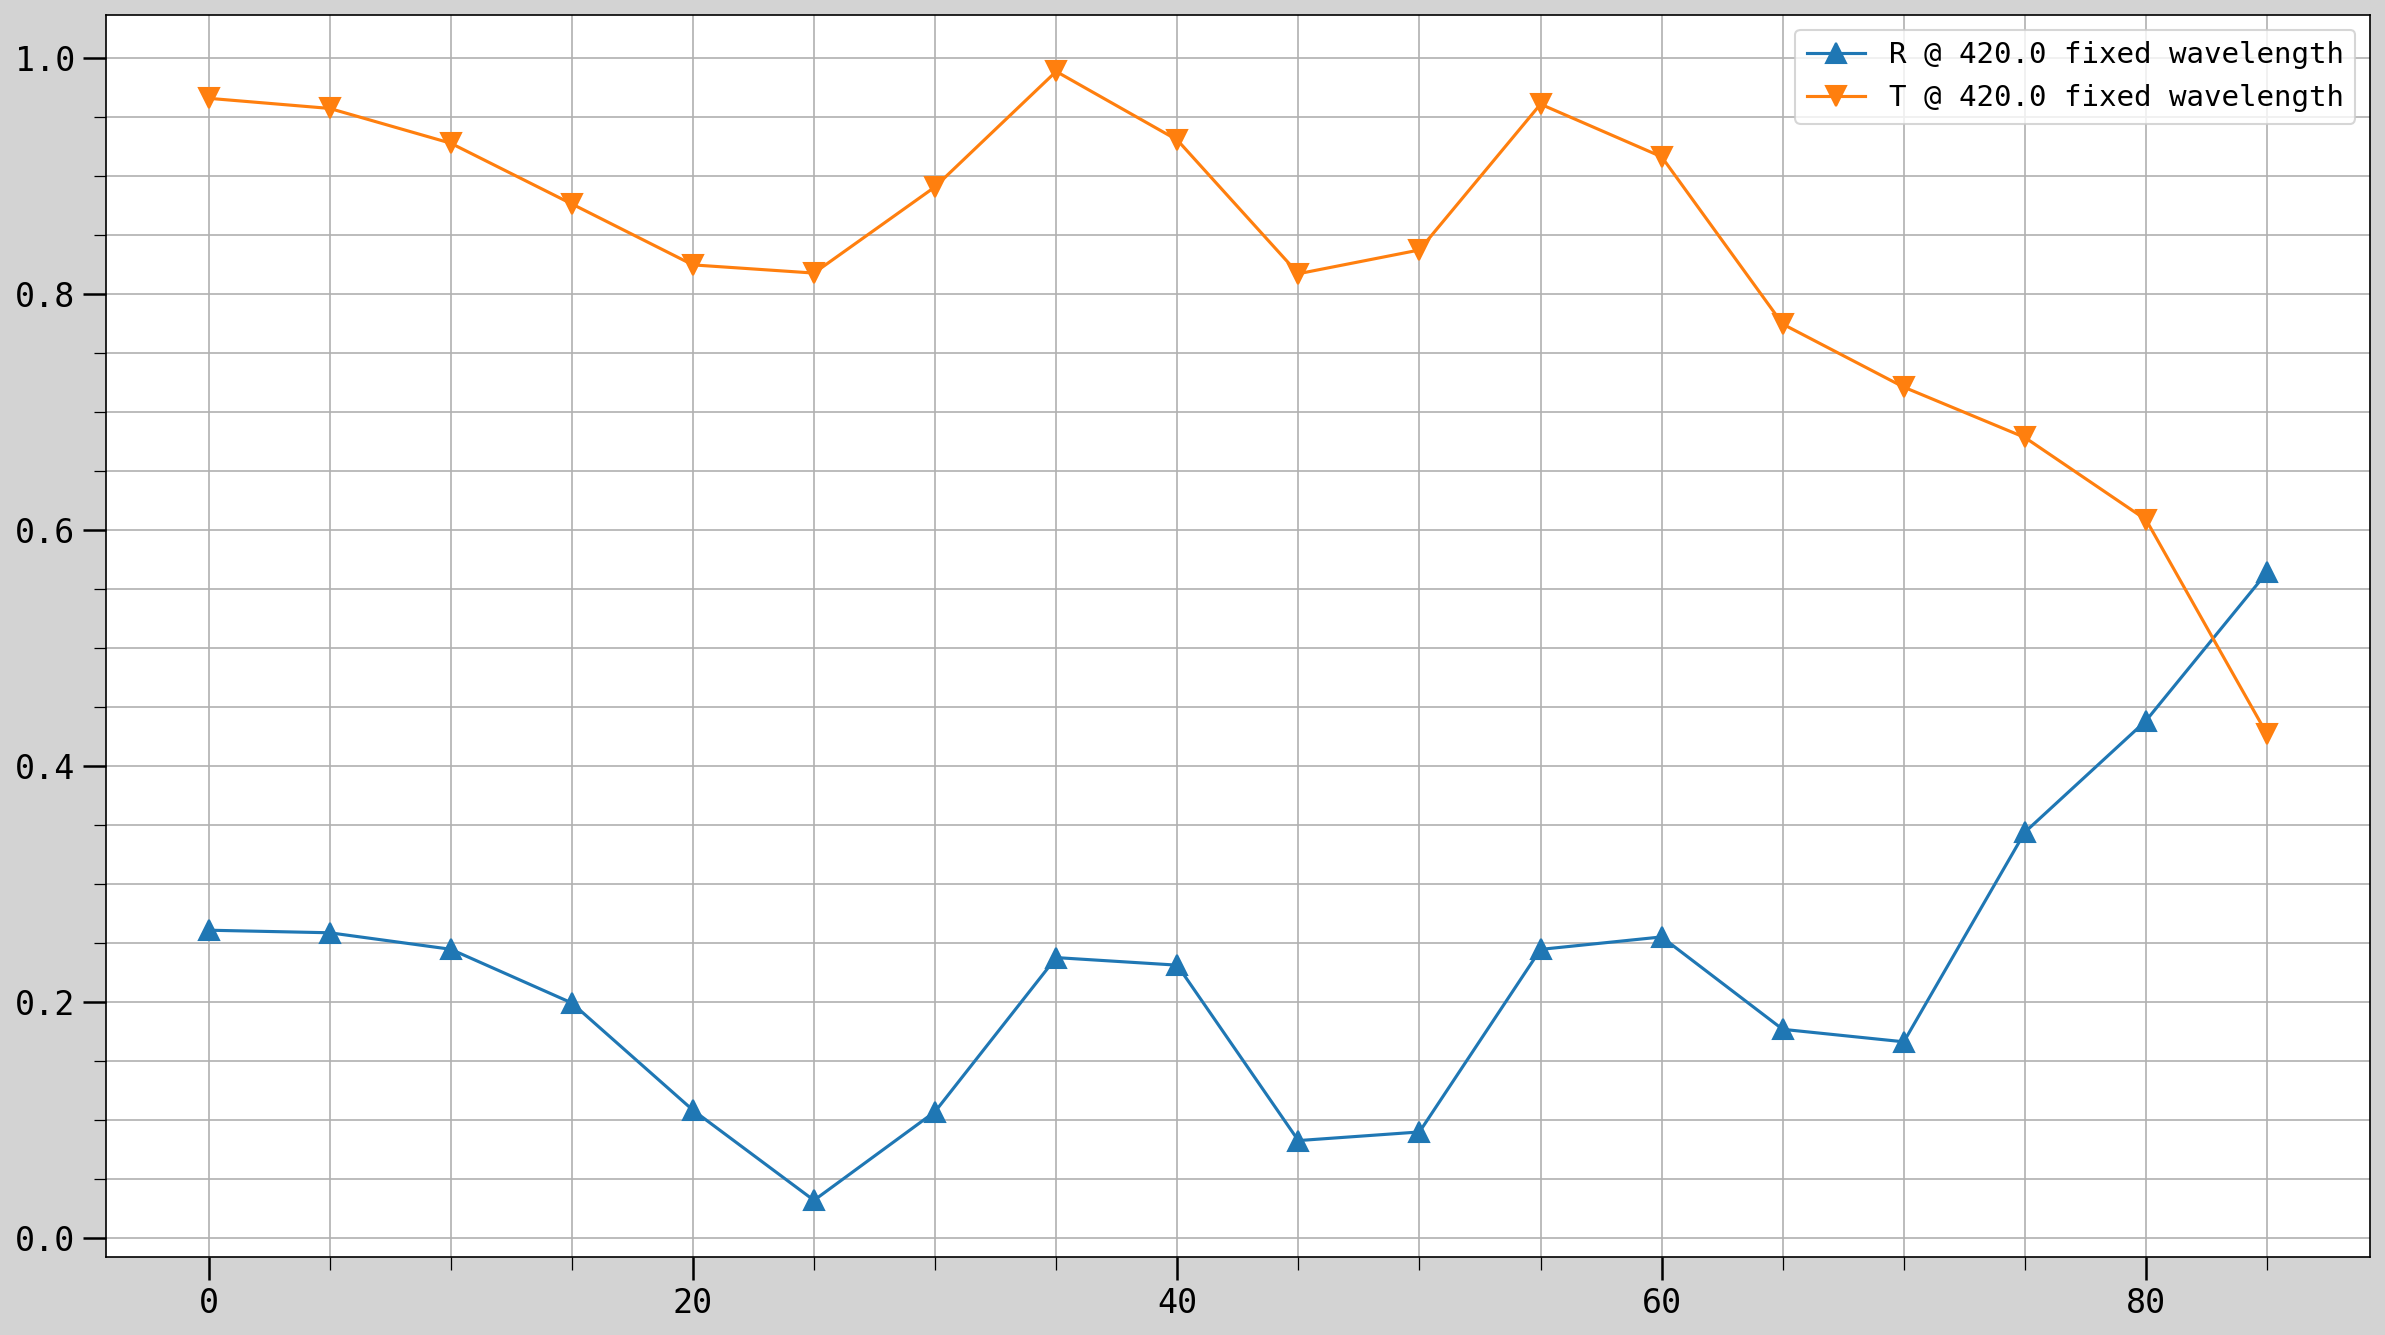

In [36]:
fig7 = plt.figure()
fig7.set_facecolor('lightgrey')
ax7 = plt.axes()

# ax7.plot(T_SiPM_alberto_df['Wavelength'], T_SiPM_alberto_df['05'], label='T')
# ax7.plot(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['05'], label='R')
# # ax7.plot(T_SiPM_alberto_df['Wavelength'], T_SiPM_alberto_df['05'] + R_SiPM_alberto_df['05'], label='T+R')

ax7.plot(angle_list, R_SiPM_alberto_df2.iloc[300][1:], '-^', label=f'R @ {R_SiPM_alberto_df.iloc[300][0]} fixed wavelength')
ax7.plot(angle_list, T_SiPM_alberto_df.iloc[300][1:], '-v',label=f'T @ {T_SiPM_alberto_df.iloc[300][0]} fixed wavelength')
ax7.legend()
ax7.grid(which='both')

<p> In conclusion: these are angles with respect to normal to surface and not grazing angles<p>